# Ensuring Everything is in the right place

In [32]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Downloading Data

In [33]:
import os
import tarfile
import urllib.request

url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
path = os.path.join("datasets", "housing")
url_housing = url + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=url_housing, housing_path=path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [34]:
fetch_housing_data()

# Loading the Data

In [35]:
import pandas as pd

housing = pd.read_csv(os.path.join(path,'housing.csv'))
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Examining the Data

In [36]:
# Getting list of columns
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [37]:
# Getting bit more info on data
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
# Count of values of categorical labels
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
# Statistical summary of data
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


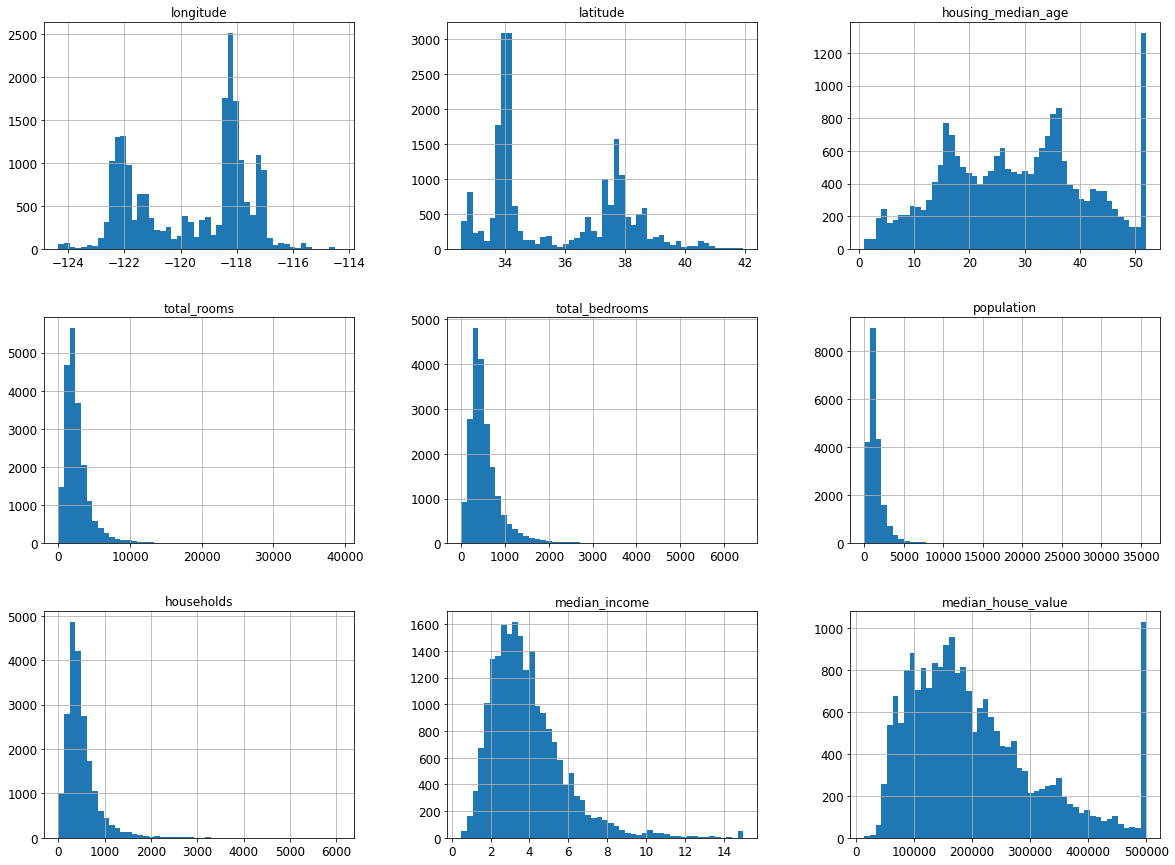

In [40]:
# Visualizing data
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Creating Test Set

In [41]:
from sklearn.model_selection import train_test_split

X, y = train_test_split(housing, test_size=0.2, random_state=42)



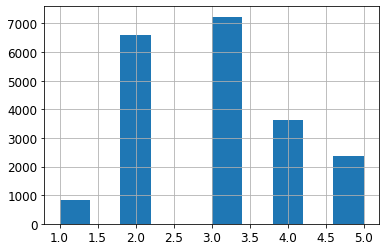

In [42]:
# Converitng median income to labels
# this is done mainly for doing stratified shuffling, in this case based on income category
housing["income_cat"]= pd.cut(housing["median_income"],
                              bins=[0.,1.5,3.0,4.5,6.0,np.inf],
                              labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [43]:
# The following shows how stratefication helps obtain test and train sets 
#in similar distributions as that of the original dataset
#
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
  strat_train = housing.loc[train_index]
  strat_test = housing.loc[test_index]
test_dist = strat_test["income_cat"].value_counts()/len(strat_test)
print(test_dist)
housing["income_cat"].value_counts()/len(housing)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64


3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [44]:
# Removing the income_cat column
strat_train.drop('income_cat', axis=1, inplace=True)
strat_test.drop('income_cat', axis=1, inplace=True)

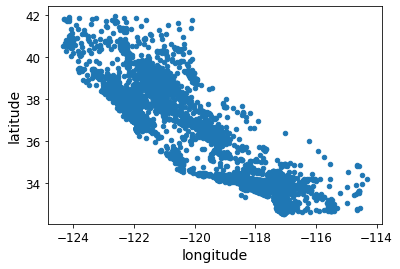

In [45]:
house = strat_train.copy()
house.plot(kind="scatter",x="longitude", y="latitude")

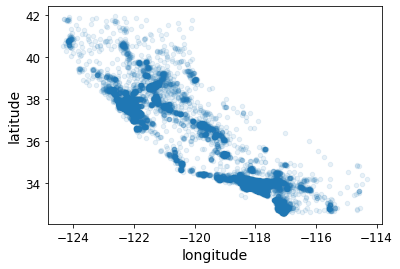

In [46]:
house.plot(kind="scatter",x="longitude", y="latitude", alpha=0.1)

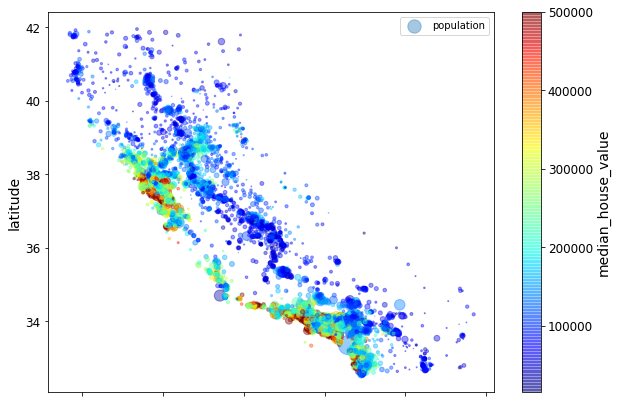

In [47]:
house.plot(kind="scatter",x="longitude", y="latitude", alpha=0.4,
           s=house["population"]/100, label="population", figsize=(10,7),
           c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [48]:
corr_matrix = house.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


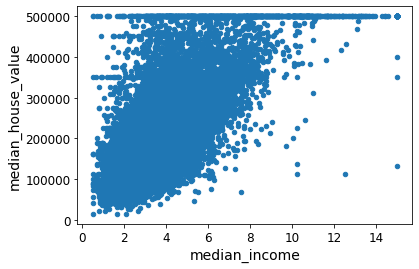

In [49]:
house.plot(kind="scatter",x="median_income", y="median_house_value")

In [50]:
house["rooms_per_household"] = house["total_rooms"]/house["households"]
house["bedrooms_per_room"] = house["total_bedrooms"]/house["total_rooms"]
house["population_per_household"]=house["population"]/house["households"]
corr_matrix = house.corr()
print(corr_matrix["median_house_value"].sort_values(ascending=False))
corr_stan = housing.corr()
print(corr_stan["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64
median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64


In [51]:
# Preparing the data
house = strat_train.drop("median_house_value", axis=1)
labels = strat_train['median_house_value'].copy()

## Data Cleaning


In [52]:
# SimpleImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [53]:
house_num= house.drop("ocean_proximity", axis=1)
imputer.fit(house_num)

SimpleImputer(strategy='median')

In [54]:
X1= imputer.transform(house_num)

In [55]:
X1= pd.DataFrame(X1)
X1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       16512 non-null  float64
 1   1       16512 non-null  float64
 2   2       16512 non-null  float64
 3   3       16512 non-null  float64
 4   4       16512 non-null  float64
 5   5       16512 non-null  float64
 6   6       16512 non-null  float64
 7   7       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.0 MB


In [56]:
# Handling text/categorical data
house_cat = house[["ocean_proximity"]]
house_cat.head()
house_cat.shape

(16512, 1)

In [57]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
house_cat_E = OE.fit_transform(house_cat)
house_cat_E[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [58]:
OE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [59]:
# With one hot encoder to not have ordinality
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
house_cat_OHE = OHE.fit_transform(house_cat)
house_cat_OHE.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [60]:
OHE.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## Custom Transformers

In [61]:
from sklearn.base import BaseEstimator, TransformerMixin

# column index
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

## Feature Scaling

In [62]:
# Min-max scaling and standardiazation are most popular

# Min-max scaling is essentially normalization where 
# for every value, value - min/max-min is done

# In Standardization, all values are deducted by mean, and divided by standard deviation

# Transformation Pipelines

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('att_add', CombinedAttributesAdder()),
                         ('std_scalar', StandardScaler())])

house_num_pip = num_pipeline.fit_transform(house_num)

## Cloumn Transformers
Allows for tranforming heterogenous columns

In [64]:
from sklearn.compose import ColumnTransformer
num_attrs = list(house_num)
cat_attrs = ['ocean_proximity']

hetero_pip = ColumnTransformer([('nums', num_pipeline, num_attrs),
                                ('cats', OneHotEncoder(), cat_attrs)])
house_hetero = hetero_pip.fit_transform(house)

In [79]:
house_hetero.columns

AttributeError: ignored

# Selecting and Training Models

## Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(house_hetero, labels)

LinearRegression()

In [66]:
some_d = house # in texty, only 5 are used. But that encounters a problem during OHE
# print(some_d)
some_l = labels
some_y_hat = hetero_pip.fit_transform(some_d)
lin_reg.predict(some_y_hat)

array([ 85657.90192014, 305492.60737488, 152056.46122456, ...,
       220683.15054463, 238863.55319782,  98197.80203821])

## Metrics


In [67]:
from sklearn.metrics import mean_squared_error
predicts = lin_reg.predict(house_hetero)
lin_mse = mean_squared_error(labels, predicts)
lin_mse, np.sqrt(lin_mse)

(4709785076.060029, 68627.87390018745)

## Decision Tree Prelude

In [68]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(house_hetero, labels)


DecisionTreeRegressor()

In [69]:
tree_pred = tree_reg.predict(house_hetero)
tree_mse = mean_squared_error(labels, tree_pred)
tree_mse, np.sqrt(tree_mse)

(0.0, 0.0)

## Cross Validation

In [70]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, house_hetero, labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

np.sqrt(-scores), np.sqrt(-scores).mean(), np.sqrt((-scores)).std()

(array([73046.59216997, 69527.29909999, 68716.50586106, 72684.40339465,
        69744.96091492, 76403.42732903, 71592.74187094, 73721.60630301,
        68627.75247739, 72693.89065708]), 71675.91800780455, 2384.696078388864)

In [71]:
scores_lr = cross_val_score(lin_reg, house_hetero, labels, scoring="neg_mean_squared_error", cv=10)

np.sqrt(-scores_lr), np.sqrt(-scores_lr).mean(), np.sqrt(-scores_lr).std()

(array([71762.76364394, 64114.99166359, 67771.17124356, 68635.19072082,
        66846.14089488, 72528.03725385, 73997.08050233, 68802.33629334,
        66443.28836884, 70139.79923956]),
 69104.07998247063,
 2880.3282098180634)

In [72]:
from sklearn.ensemble import RandomForestRegressor
freg = RandomForestRegressor()
score_freg = cross_val_score(freg, house_hetero, labels, scoring='neg_mean_squared_error', cv=10)
np.sqrt(-score_freg), np.sqrt(-score_freg).mean(), np.sqrt(-score_freg).std()

(array([51465.86776369, 48955.8098724 , 47001.05135178, 52043.94440081,
        47082.65142975, 52161.59546092, 52504.73063896, 49869.97947958,
        48541.82713746, 54118.83401011]),
 50374.62915454719,
 2314.5646075129694)

# Fine Tuning the Model

## Grid Search

In [73]:
param_grid = [{'n_estimators':[0.01,0.1,1,10,100], 'max_features':[2,4,6,8]},
              {'bootstrap':[False],'n_estimators':[0.01,0.1,1,10,100], 'max_features':[2,4,6,8] }]
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(freg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(house_hetero, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 392, in fit
    self._validate_estimator()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_base.py", line 133, in _validate_estimator
    type(self.n_estimators)
ValueError: n_estimators must be an integer, got <class 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [0.01, 0.1, 1, 10, 100]},
                         {'bootstrap': [False], 'max_features': [2, 4, 6, 8],
                          'n_estimators': [0.01, 0.1, 1, 10, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [74]:
grid_search.best_params_, grid_search.best_estimator_

({'bootstrap': False, 'max_features': 6, 'n_estimators': 100},
 RandomForestRegressor(bootstrap=False, max_features=6))

In [75]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score), params)

nan {'max_features': 2, 'n_estimators': 0.01}
nan {'max_features': 2, 'n_estimators': 0.1}
83510.46508371238 {'max_features': 2, 'n_estimators': 1}
55554.833325760694 {'max_features': 2, 'n_estimators': 10}
51659.99448313026 {'max_features': 2, 'n_estimators': 100}
nan {'max_features': 4, 'n_estimators': 0.01}
nan {'max_features': 4, 'n_estimators': 0.1}
76884.68962909623 {'max_features': 4, 'n_estimators': 1}
53090.21503929578 {'max_features': 4, 'n_estimators': 10}
49551.141960305926 {'max_features': 4, 'n_estimators': 100}
nan {'max_features': 6, 'n_estimators': 0.01}
nan {'max_features': 6, 'n_estimators': 0.1}
74411.16627235248 {'max_features': 6, 'n_estimators': 1}
51837.61622694864 {'max_features': 6, 'n_estimators': 10}
49326.14911559623 {'max_features': 6, 'n_estimators': 100}
nan {'max_features': 8, 'n_estimators': 0.01}
nan {'max_features': 8, 'n_estimators': 0.1}
74160.20092375038 {'max_features': 8, 'n_estimators': 1}
52381.81161345944 {'max_features': 8, 'n_estimators': 1

## Randomized Search

In [76]:
# Instead of manually providing parameters, randomized search randomly sets hyperparameters 
# for the given number of iterations

In [77]:
feature_importance = grid_search.best_estimator_.feature_importances_
cat_encoder = hetero_pip.named_transformers_["cats"]
cat_OHE = list(cat_encoder.categories_[0])
attributes = num_attrs + ["rooms_per_household", "pop_per_household", "bedrooms_per_household"] + cat_OHE
sorted(zip(feature_importance, attributes), reverse=True)

[(0.33305997033124846, 'median_income'),
 (0.15732804681027468, 'INLAND'),
 (0.10861479546406655, 'pop_per_household'),
 (0.07773559378227357, 'longitude'),
 (0.07197958413636645, 'latitude'),
 (0.07022749321519911, 'bedrooms_per_household'),
 (0.0569598917850314, 'rooms_per_household'),
 (0.04268734279143818, 'housing_median_age'),
 (0.016695334163441856, 'population'),
 (0.016683593852209345, 'total_rooms'),
 (0.015966793771448457, 'total_bedrooms'),
 (0.01584008165444819, 'households'),
 (0.009719406095043084, '<1H OCEAN'),
 (0.003751368457670068, 'NEAR OCEAN'),
 (0.002691180758970325, 'NEAR BAY'),
 (5.9522930870251056e-05, 'ISLAND')]

# Evaluating the Model on Test Set

In [78]:
final_model = grid_search.best_estimator_
X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()

X_test_predict = final_model.predict(hetero_pip.transform(X_test))

final_mse = mean_squared_error(y_test, X_test_predict)
print(np.sqrt(final_mse))

46368.011839249004
